In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pylab as plt
import random

In [2]:
def numerical_gradient(f, x):
    h = 0.0001
    # x와 같은 모양의 배열 gradient 생성.
    gradient = np.zeros_like(x) 
    
    for idx in range(x.size):
        tmp_val = x[idx]
        x[idx] = tmp_val + h
        fxh1 = f(x)
        
        x[idx] = tmp_val - h
        fxh2 = f(x)
        
        gradient[idx] = (fxh1 - fxh2) / h
        x[idx] = tmp_val
        
    return gradient

def gradient_function(x):
    return x[0]**2 / 10.0 + x[1] ** 2

def graph_function(x, y):
    return x**2 / 10.0 + y ** 2

def gradient_descent(f, init_pos , learning_rate, step_num = 30):
    x = init_pos
    list_pos = []
    list_pos.append([x[0],x[1]])

    for i in range(step_num):
        dx = numerical_gradient(f, x)
        x -= learning_rate * dx
        list_pos.append(x.copy())
    return np.array(list_pos)

def Momentum_gradient_descent(f, init_pos , learning_rate, step_num = 30):
    x = init_pos
    list_pos = []
    list_pos.append([x[0],x[1]])
    
    rho = 0.99
    vx = 0
    for i in range(step_num):
        dx = numerical_gradient(f, x)
        vx = rho * vx - dx
        x += learning_rate * vx
        list_pos.append(x.copy())
    return np.array(list_pos)

def Nesterov_gradient_descent(f, init_pos , learning_rate, step_num = 30):
    x = init_pos
    list_pos = []
    list_pos.append([x[0],x[1]])
    
    rho = 0.9
    vx = 0
    for i in range(step_num):
        dx = numerical_gradient(f, x)
        old_v = vx
        v = rho * vx - learning_rate * dx
        x += -rho * old_v + (1 + rho) * v
        list_pos.append(x.copy())        
    return np.array(list_pos)

def AdaGrad_gradient_descent(f, init_pos , learning_rate, step_num = 30):
    x = init_pos
    list_pos = []
    list_pos.append([x[0],x[1]])
    
    grad_squared = 0
    for i in range(step_num):
        dx = numerical_gradient(f, x)
        grad_squared += dx * dx
        x -= learning_rate * dx / (np.sqrt(grad_squared) + 1e-7)
        list_pos.append(pos.copy())    
    return np.array(list_pos)

def RMSProp_gradient_descent(f, init_pos , learning_rate, step_num = 30):
    x = init_pos
    list_pos = []
    list_pos.append([x[0],x[1]])
    
    grad_squared = 0
    decay_rate = 0.99
    for i in range(step_num):
        dx = numerical_gradient(f, x)
        grad_squared += decay_rate * grad_squared + (1 - decay_rate) * dx * dx 
        x -= learning_rate * dx / (np.sqrt(grad_squared) + 1e-7)
        list_pos.append(x.copy())
    return np.array(list_pos)

def Adam_gradient_descent(f, init_pos , learning_rate, step_num = 30):
    x = init_pos
    list_pos = []
    list_pos.append([x[0],x[1]])
    
    t = 1
    first_moment = 0
    second_moment = 0
    beta1 = 0.9 
    beta2 = 0.999
    for i in range(step_num):
        dx = numerical_gradient(f, x)
        first_moment = beta1 * first_moment + (1 - beta1) * dx
        second_moment = beta2 * second_moment * (1 - beta2) * dx * dx
        first_unbias = first_moment / (1 - beta1 ** t)
        second_unbias = second_moment / (1 - beta2 ** t)
        x -= learning_rate * first_unbias / (np.sqrt(second_unbias) + 1e-7)
        list_pos.append(x.copy())
        t+=1
    return np.array(list_pos)

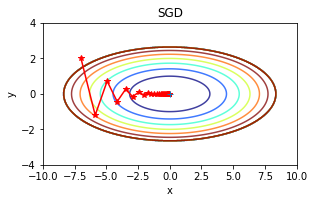

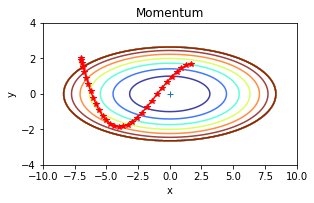

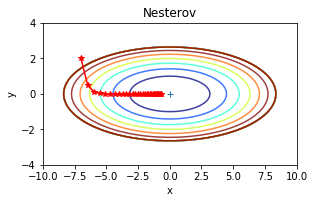

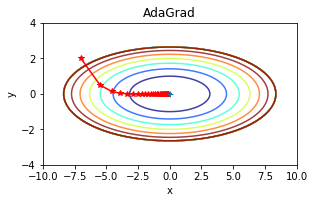

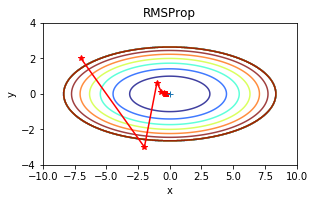

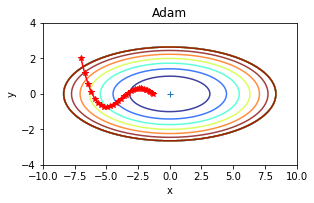

In [5]:
pos = np.array([-7.0, 2.0])
list_xy_1 = gradient_descent(gradient_function, init_pos=pos,learning_rate=0.4)
pos = np.array([-7.0, 2.0])
list_xy_2 = Momentum_gradient_descent(gradient_function, init_pos=pos,learning_rate=0.01)
pos = np.array([-7.0, 2.0])
list_xy_3 = Nesterov_gradient_descent(gradient_function, init_pos=pos,learning_rate=0.1)
pos = np.array([-7.0, 2.0])
list_xy_4 = AdaGrad_gradient_descent(gradient_function, init_pos=pos,learning_rate=1.5)
pos = np.array([-7.0, 2.0])
list_xy_5 = RMSProp_gradient_descent(gradient_function, init_pos=pos,learning_rate=0.5)
pos = np.array([-7.0, 2.0])
list_xy_6 = Adam_gradient_descent(gradient_function, init_pos=pos,learning_rate=0.00000001)


a = [list_xy_1,list_xy_2,list_xy_3,list_xy_4,list_xy_5,list_xy_6]
name = ['SGD','Momentum','Nesterov','AdaGrad','RMSProp','Adam']

idx = 1
for i in a:
    list_xy = i
    x = np.arange(-10, 10, 0.01)
    y = np.arange(-5, 5, 0.01)
    X, Y = np.meshgrid(x, y) 
    Z = graph_function(X, Y)
    mask = Z > 7
    Z[mask] = 0
    
    plt.figure(figsize=(10,12))
    plt.subplot(4, 2, idx)
    plt.plot(list_xy[:,0], list_xy[:,1], '*-', color="red")
    plt.contour(X, Y, Z,alpha=.75, cmap='jet')
    plt.title(name[idx-1])
    plt.xlim(-10, 10)
    plt.ylim(-4, 4)
    plt.plot(0, 0, '+')
    plt.xlabel("x")
    plt.ylabel("y")
    idx+=1
plt.show()